In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

data=pd.read_csv("loan_train.csv")
data.head()

,Gender,Married,Dependents,Education,Self_Employed,Applicant_Income,Coapplicant_Income,Loan_Amount,Term,Credit_History,Area,Status
0,Male,No,0,Graduate,No,584900,0.0,15000000,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,458300,150800.0,12800000,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,300000,0.0,6600000,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,258300,235800.0,12000000,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,600000,0.0,14100000,360.0,1.0,Urban,Y


In [2]:
data.shape

(614, 12)

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Gender              601 non-null    object 
 1   Married             611 non-null    object 
 2   Dependents          599 non-null    object 
 3   Education           614 non-null    object 
 4   Self_Employed       582 non-null    object 
 5   Applicant_Income    614 non-null    int64  
 6   Coapplicant_Income  614 non-null    float64
 7   Loan_Amount         614 non-null    int64  
 8   Term                600 non-null    float64
 9   Credit_History      564 non-null    float64
 10  Area                614 non-null    object 
 11  Status              614 non-null    object 
dtypes: float64(3), int64(2), object(7)
memory usage: 57.7+ KB


In [4]:
data.isnull().sum()

Gender                13
Married                3
Dependents            15
Education              0
Self_Employed         32
Applicant_Income       0
Coapplicant_Income     0
Loan_Amount            0
Term                  14
Credit_History        50
Area                   0
Status                 0
dtype: int64

In [5]:
data.describe()

,Applicant_Income,Coapplicant_Income,Loan_Amount,Term,Credit_History
count,6.140000e+02,6.140000e+02,6.140000e+02,600.00000,564.000000
mean,5.403459e+05,1.621246e+05,1.414104e+07,342.00000,0.842199
std,6.109042e+05,2.926248e+05,8.815682e+06,65.12041,0.364878
min,1.500000e+04,0.000000e+00,0.000000e+00,12.00000,0.000000
25%,2.877500e+05,0.000000e+00,9.800000e+06,360.00000,1.000000
50%,3.812500e+05,1.188500e+05,1.250000e+07,360.00000,1.000000
75%,5.795000e+05,2.297250e+05,1.647500e+07,360.00000,1.000000
max,8.100000e+06,4.166700e+06,7.000000e+07,480.00000,1.000000


In [6]:
for x in data:
    if data[x].isnull().sum()!=0:
        print(x,": : ",data[x].unique(),"\n\n")

Gender : :  ['Male' 'Female' nan] 


Married : :  ['No' 'Yes' nan] 


Dependents : :  ['0' '1' '2' '3+' nan] 


Self_Employed : :  ['No' 'Yes' nan] 


Term : :  [360. 120. 240.  nan 180.  60. 300. 480.  36.  84.  12.] 


Credit_History : :  [ 1.  0. nan] 




In [7]:
data.Credit_History.fillna(0,inplace=True)
data.Gender.fillna("Male",inplace=True)
data.Dependents.fillna('0',inplace=True)
data.Married.fillna("No",inplace=True)
data.Self_Employed.fillna("Yes",inplace=True)
data.Term.fillna(data.Term.mean(),inplace=True)

In [8]:
data.isnull().sum()

Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
Applicant_Income      0
Coapplicant_Income    0
Loan_Amount           0
Term                  0
Credit_History        0
Area                  0
Status                0
dtype: int64

In [9]:
data.head()

,Gender,Married,Dependents,Education,Self_Employed,Applicant_Income,Coapplicant_Income,Loan_Amount,Term,Credit_History,Area,Status
0,Male,No,0,Graduate,No,584900,0.0,15000000,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,458300,150800.0,12800000,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,300000,0.0,6600000,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,258300,235800.0,12000000,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,600000,0.0,14100000,360.0,1.0,Urban,Y


In [10]:
for x in data:
    print(x,": : ",data[x].unique(),"\n\n")

Gender : :  ['Male' 'Female'] 


Married : :  ['No' 'Yes'] 


Dependents : :  ['0' '1' '2' '3+'] 


Education : :  ['Graduate' 'Not Graduate'] 


Self_Employed : :  ['No' 'Yes'] 


Applicant_Income : :  [ 584900  458300  300000  258300  600000  541700  233300  303600  400600
 1284100  320000  250000  307300  185300  129900  495000  359600  351000
  488700  260000  766000  595500  336500  371700  956000  279900  422600
  144200  375000  416600  316700  469200  350000 1250000  227500  182800
  366700  374800  360000  180000  240000  394100  469500  341000  564900
  582100  264500  400000  192800  308600  423000  461600 1150000  270800
  213200  336600  808000  335700  302900  260900  494500  572600 1075000
  710000  430000  320800  187500  475500  526600  100000  333300  384600
  239500  137800  398800  236600  856600  569500  295800  625000  327300
  413300  362000  678200  248400  197700  418800  175900  428800  484300
 1365000  465200  381600  305200 1141700  733300  380000  207100  5

In [15]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for x in data:
    data[x]=le.fit_transform(data[x])
data.head()

,Gender,Married,Dependents,Education,Self_Employed,Applicant_Income,Coapplicant_Income,Loan_Amount,Term,Credit_History,Area,Status
0,1,0,0,0,0,376,0,103,9,1,2,1
1,1,1,1,0,0,306,60,82,9,1,0,0
2,1,1,0,0,1,139,0,27,9,1,2,1
3,1,1,0,1,0,90,160,74,9,1,2,1
4,1,0,0,0,0,381,0,95,9,1,2,1


In [16]:
features=data.drop(columns=["Status"])

C:\Users\dk260\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


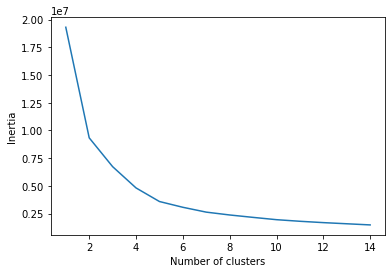

In [17]:
#ELBOW METHOD
inertia=[]
from sklearn.cluster import KMeans
for i in range(1,15):
    k_means=KMeans(n_clusters=i)
    k_means.fit(features)
    inertia.append(k_means.inertia_)

plt.plot(range(1,15),inertia)
plt.xlabel("Number of clusters")
plt.ylabel("Inertia")
plt.show()

C:\Users\dk260\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


   Gender  Married  Dependents  Education  Self_Employed  Applicant_Income  \
0       1        0           0          0              0               376   
1       1        1           1          0              0               306   
2       1        1           0          0              1               139   
3       1        1           0          1              0                90   
4       1        0           0          0              0               381   

   Coapplicant_Income  Loan_Amount  Term  Credit_History  Area  Status  \
0                   0          103     9               1     2       1   
1                  60           82     9               1     0       0   
2                   0           27     9               1     2       1   
3                 160           74     9               1     2       1   
4                   0           95     9               1     2       1   

   output_1  output_2  
0         0         0  
1         0         0  
2         0   

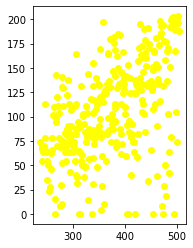

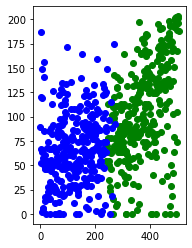

In [21]:
accuracy_k=[]#THis will store the accuracy of each Iteration for k=1,k=2,k=3,......
correct_count=0
for k in range(1,3):
    k_means=KMeans(n_clusters=k)
    col_name="output_"+str(k)
    data[col_name]=k_means.fit_predict(features)
    correct_count=sum(data["Status"]==data[col_name])
    correct_count=(correct_count/len(data.Status))*100
    accuracy_k.append(correct_count)
    correct_count=0

print(data.head())
print("ACCURACY:",accuracy_k)

plt.subplot(1,2,1)
plt.scatter(data.Applicant_Income[data[col_name]==0],data.Loan_Amount[data[col_name]==0],color="yellow")
plt.show()

plt.subplot(1,2,2)
plt.scatter(data.Applicant_Income[data[col_name]==0],data.Loan_Amount[data[col_name]==0],color="green")
plt.scatter(data.Applicant_Income[data[col_name]==1],data.Loan_Amount[data[col_name]==1],color="blue")
plt.show()